DESAFIO 06 - DIEGO RIBEIRO

ETAPA 01 - DATA UNDERSTANDING - FAZENDO UMA ANALISE EXPLORATORIA DOS DADOS

In [ ]:
# Importando as bibiotecas iniciais para uso no desafio

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Importando e visualizando a base de dados

dados = pd.read_csv('streaming_data.csv')
dados.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,NaN,3,NaN,0.0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,NaN,1,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,NaN,5.0,Basic,NaN,2,NaN,NaN,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
4,18.0,NaN,1948.0,3.0,Basic,NaN,3,3.88,0.0,14879bcb-1977-4ad8-a7f9-6aa9bf7b872f


In [ ]:
# Vendo as estatisticas dos dados

dados.describe()

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Churned
count,66607.000000,56464.000000,52696.000000,9572.000000,77884.000000,60614.000000,61148.000000
mean,43.511072,4385.848505,2.995370,2.496239,3.002273,3.002252,0.243066
std,15.043158,2526.580859,1.414072,1.120700,1.413235,1.154963,0.428938
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,30.000000,2196.000000,2.000000,1.000000,2.000000,1.990000,0.000000
50%,43.000000,4384.000000,3.000000,2.000000,3.000000,3.010000,0.000000
75%,57.000000,6573.000000,4.000000,4.000000,4.000000,4.000000,0.000000
max,69.000000,8759.000000,5.000000,4.000000,5.000000,5.000000,1.000000


In [ ]:
# Verificando os tipos de dados

dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77884 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     66607 non-null  float64
 1   Gender                  63368 non-null  object 
 2   Time_on_platform        56464 non-null  float64
 3   Devices_connected       52696 non-null  float64
 4   Subscription_type       52663 non-null  object 
 5   Num_streaming_services  9572 non-null   float64
 6   Num_active_profiles     77884 non-null  int64  
 7   Avg_rating              60614 non-null  float64
 8   Churned                 61148 non-null  float64
 9   User_id                 77884 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 5.9+ MB


In [ ]:
# Verificando os dados faltantes

dados.isna().sum()

,0
Age,11277
Gender,14516
Time_on_platform,21420
Devices_connected,25188
Subscription_type,25221
Num_streaming_services,68312
Num_active_profiles,0
Avg_rating,17270
Churned,16736
User_id,0


ETAPA 02 - DATA PREPARATION - TRATANDO OS DADOS PARA SEREM UTILIZADOS NOS MODELOS DE CLASSIFICACAO

In [ ]:
dados = dados.dropna()

In [ ]:
# Substituindo os valores “NaN” por 0 Colunas: Time_on_platform, Num_streaming_services, Churned, Avg_rating, Devices_connected

dados["Time_on_platform"].fillna("0", inplace = True)
dados["Num_streaming_services"].fillna("0", inplace = True)
dados["Churned"].fillna("0", inplace = True)
dados["Avg_rating"].fillna("0", inplace = True)
dados["Devices_connected"].fillna("0", inplace = True)

dados.head()

<ipython-input-1156-8188eac9984b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados["Time_on_platform"].fillna("0", inplace = True)
<ipython-input-1156-8188eac9984b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados["Num_streaming_services"].fillna("0", inplace = True)
<ipython-input-1156-8188eac9984b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados["Churned"].fillna("0", inplace = True)
<ipython-input-1156-8188eac9984

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d
22,49.0,Female,1015.0,1.0,Standard,2.0,1,3.90,1.0,6d7cda84-d34e-4756-9849-66824c41d195
25,63.0,Female,249.0,2.0,Standard,4.0,5,2.29,0.0,44879a07-a820-4316-a6d1-ddc14c9b8ab1
49,69.0,Female,8655.0,2.0,Premium,3.0,5,3.45,1.0,216d81d7-f6eb-405f-bf16-a8303357db76
59,47.0,Male,280.0,1.0,Standard,3.0,2,3.04,0.0,1e6bc717-4037-4acc-b1b7-a45055036ee4


In [ ]:
#  Eliminando as linhas nulas nas colunas: Gender, Subscription_type e Age
dados["Gender"].dropna(inplace = True)
dados["Subscription_type"].dropna(inplace = True)
dados["Age"].dropna(inplace = True)

<ipython-input-1157-82e43d454aa3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados["Gender"].dropna(inplace = True)
<ipython-input-1157-82e43d454aa3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados["Subscription_type"].dropna(inplace = True)
<ipython-input-1157-82e43d454aa3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados["Age"].dropna(inplace = True)


In [ ]:
# Transformando valores churned 0 e 1 por No e Yes

dados["Churned"] = dados["Churned"].replace({1: 'Yes', 0: 'No'})

<ipython-input-1158-142f5c719cba>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados["Churned"] = dados["Churned"].replace({1: 'Yes', 0: 'No'})


In [ ]:
# Transformando dados tipo float em tipo inteiro

dados["Age"] = dados["Age"].astype(int)
dados["Time_on_platform"] = dados["Time_on_platform"].astype(int)
dados["Devices_connected"] = dados["Devices_connected"].astype(int)
dados["Num_streaming_services"] = dados["Num_streaming_services"].astype(int)
dados["Avg_rating"] = dados["Avg_rating"].astype(int)

dados.dtypes

,0
Age,int64
Gender,object
Time_on_platform,int64
Devices_connected,int64
Subscription_type,object
Num_streaming_services,int64
Num_active_profiles,int64
Avg_rating,int64
Churned,object
User_id,object


ETAPA )3 - MODELAGEM - DEFININDO O TARGET E AS VARIAVES EXPLICATICAS, FAZENDO OS ENCODERS NECESSARIOS E APLICANDO OS MODELOS

In [ ]:
# Definindo as variaveis X (variaveis explicativas) e y (target)

X = dados.drop(columns=["User_id","Churned"], axis=1)
y = dados[["Churned"]]
y

,Churned
2,Yes
22,Yes
25,No
49,Yes
59,No
...,...
77670,No
77684,Yes
77693,No
77785,No


In [1186]:
# Fazendo a codificacao para a variavel y , para utilizar no modelo de machine learning

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(y.Churned)
y.Churned = le.transform(y.Churned)
y

<ipython-input-1186-6820a7deef24>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.Churned = le.transform(y.Churned)


,Churned
2,1
22,1
25,0
49,1
59,0
...,...
77670,0
77684,1
77693,0
77785,0


In [ ]:
# Verificando as variaveis X, para fazer a codificacao
X

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating
2,44,Male,6374,3,Premium,1,1,1
22,49,Female,1015,1,Standard,2,1,3
25,63,Female,249,2,Standard,4,5,2
49,69,Female,8655,2,Premium,3,5,3
59,47,Male,280,1,Standard,3,2,3
...,...,...,...,...,...,...,...,...
77670,51,Male,5343,1,Premium,4,5,2
77684,48,Male,3716,2,Standard,1,4,2
77693,38,Female,2799,2,Standard,3,2,4
77785,19,Male,4856,1,Premium,2,5,2


In [ ]:
# Fazendo a codificacao para as variaveis x, para utilizar no modelo de machine learning

X = pd.get_dummies(X).astype(int)
X

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Gender_Female,Gender_Male,Subscription_type_Basic,Subscription_type_Premium,Subscription_type_Standard
2,44,6374,3,1,1,1,0,1,0,1,0
22,49,1015,1,2,1,3,1,0,0,0,1
25,63,249,2,4,5,2,1,0,0,0,1
49,69,8655,2,3,5,3,1,0,0,1,0
59,47,280,1,3,2,3,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
77670,51,5343,1,4,5,2,0,1,0,1,0
77684,48,3716,2,1,4,2,0,1,0,0,1
77693,38,2799,2,3,2,4,1,0,0,0,1
77785,19,4856,1,2,5,2,0,1,0,1,0


In [ ]:
# Fazendo a normalizacao dos dados das variaveis X
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()
X = pd.DataFrame(mm.fit_transform(X))
X

,0,1,2,3,4,5,6,7,8,9,10
0,0.509804,0.727979,0.50,0.000000,0.00,0.000000,0.0,1.0,0.0,1.0,0.0
1,0.607843,0.115732,0.00,0.333333,0.00,0.666667,1.0,0.0,0.0,0.0,1.0
2,0.882353,0.028219,0.25,1.000000,1.00,0.333333,1.0,0.0,0.0,0.0,1.0
3,1.000000,0.988575,0.25,0.666667,1.00,0.666667,1.0,0.0,0.0,1.0,0.0
4,0.568627,0.031761,0.00,0.666667,0.25,0.666667,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1426,0.647059,0.610191,0.00,1.000000,1.00,0.333333,0.0,1.0,0.0,1.0,0.0
1427,0.588235,0.424312,0.25,0.000000,0.75,0.333333,0.0,1.0,0.0,0.0,1.0
1428,0.392157,0.319548,0.25,0.666667,0.25,1.000000,1.0,0.0,0.0,0.0,1.0
1429,0.019608,0.554553,0.00,0.333333,1.00,0.333333,0.0,1.0,0.0,1.0,0.0


In [ ]:
# Fazendo a separadcao dos dados em base de treino e teste

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

ETAPA 3 - MODELAGEM

ETAPA 3.1 - APLICANDO O MODELO DE REGRESSAO LOGISTICA

---



In [ ]:
# Aplicando o modelo de regressao logistica

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(class_weight='balanced')
lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(class_weight='balanced')

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
lr.predict(X_test)

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,

In [ ]:
X_test.assign(churned = y_test).assign(predito = lr.predict(X_test))

,0,1,2,3,4,5,6,7,8,9,10,churned,predito
1013,0.666667,0.930081,0.50,0.666667,1.00,0.000000,1.0,0.0,1.0,0.0,0.0,NaN,0
1426,0.647059,0.610191,0.00,1.000000,1.00,0.333333,0.0,1.0,0.0,1.0,0.0,NaN,0
1278,0.745098,0.546327,0.00,0.666667,1.00,0.333333,0.0,1.0,0.0,1.0,0.0,NaN,0
207,0.921569,0.968239,0.00,0.333333,0.25,0.333333,1.0,0.0,0.0,0.0,1.0,NaN,1
515,0.019608,0.968354,0.75,1.000000,0.00,0.000000,1.0,0.0,0.0,0.0,1.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,0.019608,0.872501,0.25,0.666667,0.25,0.666667,1.0,0.0,0.0,1.0,0.0,NaN,0
320,0.725490,0.279561,0.00,0.333333,0.75,0.000000,1.0,0.0,0.0,1.0,0.0,NaN,1
84,0.254902,0.852622,0.75,0.000000,0.50,0.333333,0.0,1.0,0.0,0.0,1.0,NaN,0
1165,0.058824,0.666057,1.00,1.000000,0.25,0.666667,0.0,1.0,0.0,0.0,1.0,NaN,0


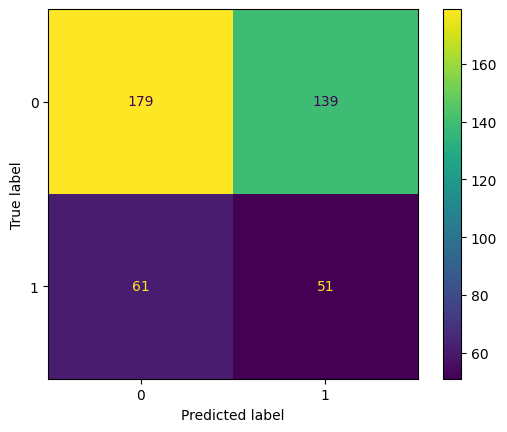

In [ ]:
#Fazendo a matrix de confusao

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_test,y_pred)

ConfusionMatrixDisplay(confusion_matrix = cm).plot(values_format = 'd')

In [ ]:
# Verificando as metricas para o modelode regressao logistica

from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print("Acurácia (Treino):", accuracy_score(y_train, lr.predict(X_train)))
print("Acurácia (Teste):", accuracy_score(y_test, lr.predict(X_test)))
print("====================================")
print("Acurácia Balanceada (Treino):", balanced_accuracy_score(y_train, lr.predict(X_train)))
print("Acurácia Balanceada (Teste):", balanced_accuracy_score(y_test, lr.predict(X_test)))
print("====================================")
print("Precisao (Treino):", precision_score(y_train, lr.predict(X_train)))
print("Precisao (Teste):", precision_score(y_test, lr.predict(X_test)))
print("====================================")
print("Recall (Treino):", recall_score(y_train, lr.predict(X_train)))
print("Recall (Teste):", recall_score(y_test, lr.predict(X_test)))
print("====================================")
print("F1 (Treino):", f1_score(y_train, lr.predict(X_train)))
print("F1 (Teste):", f1_score(y_test, lr.predict(X_test)))
print("====================================")
print("ROCAUC (Treino):", roc_auc_score(y_train, lr.predict_proba(X_train)[:,1]))
print("ROCAUC (Teste):", roc_auc_score(y_test, lr.predict_proba(X_test)[:,1]))

Acurácia (Treino): 0.5404595404595405
Acurácia (Teste): 0.5348837209302325
Acurácia Balanceada (Treino): 0.5384881570928323
Acurácia Balanceada (Teste): 0.5091251123090745
Precisao (Treino): 0.2928870292887029
Precisao (Teste): 0.26842105263157895
Recall (Treino): 0.5343511450381679
Recall (Teste): 0.45535714285714285
F1 (Treino): 0.37837837837837834
F1 (Teste): 0.33774834437086093
ROCAUC (Treino): 0.5824716710223223
ROCAUC (Teste): 0.5292284366576819


ETAPA 3.2 - APLICANDO O MODELO DE ARVORE DE DECISAO (RANDOM FOREST)


In [ ]:
# Importando o modelo de arvore de decisao para classificacao : random forest

from sklearn.ensemble import RandomForestClassifier

rf =  RandomForestClassifier(class_weight='balanced')
rf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(class_weight='balanced')

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
rf.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [ ]:
X_test.assign(churned = y_test).assign(predito = rf.predict(X_test))

,0,1,2,3,4,5,6,7,8,9,10,churned,predito
1013,0.666667,0.930081,0.50,0.666667,1.00,0.000000,1.0,0.0,1.0,0.0,0.0,NaN,0
1426,0.647059,0.610191,0.00,1.000000,1.00,0.333333,0.0,1.0,0.0,1.0,0.0,NaN,0
1278,0.745098,0.546327,0.00,0.666667,1.00,0.333333,0.0,1.0,0.0,1.0,0.0,NaN,0
207,0.921569,0.968239,0.00,0.333333,0.25,0.333333,1.0,0.0,0.0,0.0,1.0,NaN,0
515,0.019608,0.968354,0.75,1.000000,0.00,0.000000,1.0,0.0,0.0,0.0,1.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,0.019608,0.872501,0.25,0.666667,0.25,0.666667,1.0,0.0,0.0,1.0,0.0,NaN,0
320,0.725490,0.279561,0.00,0.333333,0.75,0.000000,1.0,0.0,0.0,1.0,0.0,NaN,0
84,0.254902,0.852622,0.75,0.000000,0.50,0.333333,0.0,1.0,0.0,0.0,1.0,NaN,0
1165,0.058824,0.666057,1.00,1.000000,0.25,0.666667,0.0,1.0,0.0,0.0,1.0,NaN,0


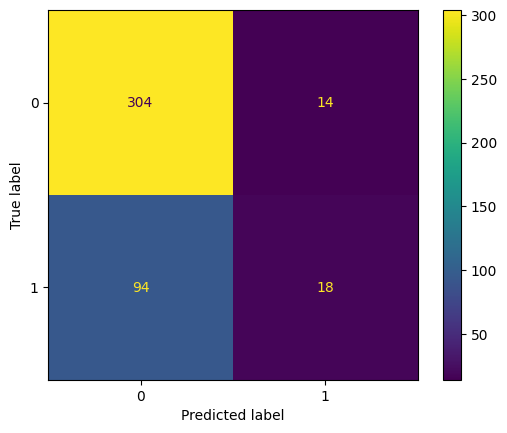

In [ ]:
#Fazendo a matrix de confusao do modelo random forest

cm = confusion_matrix(y_test,y_pred)

ConfusionMatrixDisplay(confusion_matrix = cm).plot(values_format = 'd')

In [ ]:
# Verificando as metricas para o modelode random forest

print("Acurácia (Treino):", accuracy_score(y_train, rf.predict(X_train)))
print("Acurácia (Teste):", accuracy_score(y_test, rf.predict(X_test)))
print("====================================")
print("Acurácia Balanceada (Treino):", balanced_accuracy_score(y_train, rf.predict(X_train)))
print("Acurácia Balanceada (Teste):", balanced_accuracy_score(y_test, rf.predict(X_test)))
print("====================================")
print("Precisao (Treino):", precision_score(y_train, rf.predict(X_train)))
print("Precisao (Teste):", precision_score(y_test, rf.predict(X_test)))
print("====================================")
print("Recall (Treino):", recall_score(y_train, rf.predict(X_train)))
print("Recall (Teste):", recall_score(y_test, rf.predict(X_test)))
print("====================================")
print("F1 (Treino):", f1_score(y_train, rf.predict(X_train)))
print("F1 (Teste):", f1_score(y_test, rf.predict(X_test)))
print("====================================")
print("ROCAUC (Treino):", roc_auc_score(y_train, rf.predict_proba(X_train)[:,1]))
print("ROCAUC (Teste):", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))

Acurácia (Treino): 1.0
Acurácia (Teste): 0.7488372093023256
Acurácia Balanceada (Treino): 1.0
Acurácia Balanceada (Teste): 0.5583445642407907
Precisao (Treino): 1.0
Precisao (Teste): 0.5625
Recall (Treino): 1.0
Recall (Teste): 0.16071428571428573
F1 (Treino): 1.0
F1 (Teste): 0.25000000000000006
ROCAUC (Treino): 1.0
ROCAUC (Teste): 0.6378032345013477


O MODELO RANDOM FOREST SE SAIU MELHOR DENTRE OS DOIS MODELOS> ENTAO IREMOS TINAR ELE , PARA TENTAR OTIMIZAR AS METRICAS DE PErFORMANCE DO MESMO.

ETAPA 3.3 - TUNING DO MODELO RANDOM FOREST

In [ ]:
# Importamos GridSearchCV para processo de tunagem

from sklearn.model_selection import GridSearchCV

parameters = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'n_estimators': [100, 300, 500]}

grid_search = GridSearchCV(rf, parameters, scoring='accuracy', cv=5, n_jobs=-1)

In [ ]:
# treinando o modelo do grid search

grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [100, 300, 500]},
             scoring='accuracy')

In [ ]:
# Vendo os melhores parametros para inserir no modelo TUNADO

grid_search.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# Configurando e treinando o modelo random forest TUNADO

rf_tunned =  RandomForestClassifier( bootstrap = True, ccp_alpha = 0.0,
                                     class_weight = 'balanced', criterion= 'gini',
                                     max_depth = 10, max_features= 'sqrt',
                                     max_leaf_nodes = None,
                                     max_samples = None,
                                     min_impurity_decrease = 0.0,
                                     min_samples_leaf = 1,
                                     min_samples_split = 2,
                                     min_weight_fraction_leaf = 0.0,
                                     n_estimators = 300, n_jobs = None,
                                     oob_score = False, random_state = None,
                                     verbose = 0, warm_start = False)


rf_tunned.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=300)

In [ ]:
y_pred = rf_tunned.predict(X_test)

In [ ]:
X_test.assign(churned = y_test).assign(predito = rf_tunned.predict(X_test))

,0,1,2,3,4,5,6,7,8,9,10,churned,predito
1013,0.666667,0.930081,0.50,0.666667,1.00,0.000000,1.0,0.0,1.0,0.0,0.0,NaN,0
1426,0.647059,0.610191,0.00,1.000000,1.00,0.333333,0.0,1.0,0.0,1.0,0.0,NaN,0
1278,0.745098,0.546327,0.00,0.666667,1.00,0.333333,0.0,1.0,0.0,1.0,0.0,NaN,0
207,0.921569,0.968239,0.00,0.333333,0.25,0.333333,1.0,0.0,0.0,0.0,1.0,NaN,0
515,0.019608,0.968354,0.75,1.000000,0.00,0.000000,1.0,0.0,0.0,0.0,1.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,0.019608,0.872501,0.25,0.666667,0.25,0.666667,1.0,0.0,0.0,1.0,0.0,NaN,0
320,0.725490,0.279561,0.00,0.333333,0.75,0.000000,1.0,0.0,0.0,1.0,0.0,NaN,0
84,0.254902,0.852622,0.75,0.000000,0.50,0.333333,0.0,1.0,0.0,0.0,1.0,NaN,0
1165,0.058824,0.666057,1.00,1.000000,0.25,0.666667,0.0,1.0,0.0,0.0,1.0,NaN,0


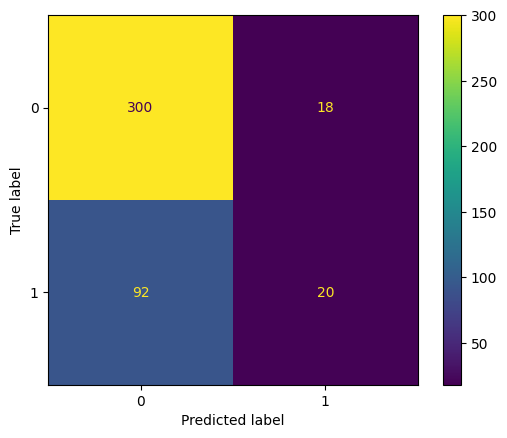

In [ ]:
#Fazendo a matrix de confusao do modelo TUNADO

cm = confusion_matrix(y_test,y_pred)

ConfusionMatrixDisplay(confusion_matrix = cm).plot(values_format = 'd')

In [ ]:
# Verificando as metricas para o modelode random forest TUNADO

print("Acurácia (Treino):", accuracy_score(y_train, rf_tunned.predict(X_train)))
print("Acurácia (Teste):", accuracy_score(y_test, rf_tunned.predict(X_test)))
print("====================================")
print("Acurácia Balanceada (Treino):", balanced_accuracy_score(y_train, rf_tunned.predict(X_train)))
print("Acurácia Balanceada (Teste):", balanced_accuracy_score(y_test, rf_tunned.predict(X_test)))
print("====================================")
print("Precisao (Treino):", precision_score(y_train, rf_tunned.predict(X_train)))
print("Precisao (Teste):", precision_score(y_test, rf_tunned.predict(X_test)))
print("====================================")
print("Recall (Treino):", recall_score(y_train, rf_tunned.predict(X_train)))
print("Recall (Teste):", recall_score(y_test, rf_tunned.predict(X_test)))
print("====================================")
print("F1 (Treino):", f1_score(y_train, rf_tunned.predict(X_train)))
print("F1 (Teste):", f1_score(y_test, rf_tunned.predict(X_test)))
print("====================================")
print("ROCAUC (Treino):", roc_auc_score(y_train, rf_tunned.predict_proba(X_train)[:,1]))
print("ROCAUC (Teste):", roc_auc_score(y_test, rf_tunned.predict_proba(X_test)[:,1]))

Acurácia (Treino): 0.999000999000999
Acurácia (Teste): 0.7837209302325582
Acurácia Balanceada (Treino): 0.9980916030534351
Acurácia Balanceada (Teste): 0.6224168912848158
Precisao (Treino): 1.0
Precisao (Teste): 0.7111111111111111
Recall (Treino): 0.9961832061068703
Recall (Teste): 0.2857142857142857
F1 (Treino): 0.9980879541108987
F1 (Teste): 0.40764331210191085
ROCAUC (Treino): 1.0
ROCAUC (Teste): 0.6529088050314465


AQUI TEMOS O MODELO FINAL COM OS PARAMETROS E METRICAS  OTIMIZADOS, PRONTO PARA ENTRAR EM PRODUCAO.